# Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

sns.set()

In [2]:
df = pd.read_csv('WineQuality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 1143 rows and 13 columns


In [4]:
print(df.isna().sum())
print("**The dataset hasn't empty data**")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
**The dataset hasn't empty data**


The dataset hasn't empty data

# Simple EDA

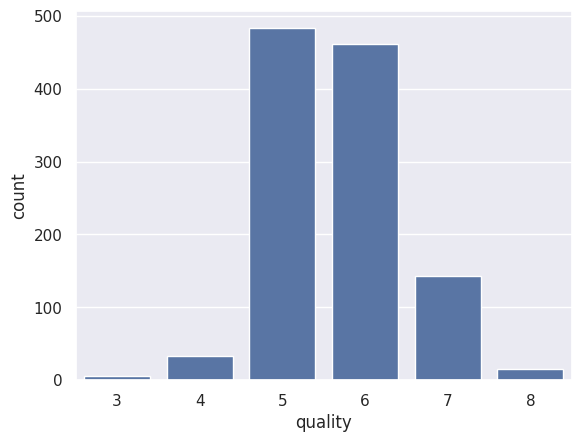

"The quality distribution has 6 values, quality scores 5 and 6 are the most frequent numbers to appear


In [5]:
plt.show(sns.countplot(x = df.quality))
print(""""The quality distribution has 6 values, quality scores 5 and 6 are the most frequent numbers to appear""")

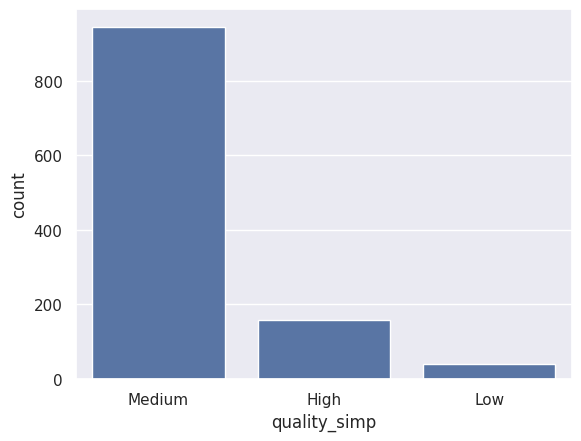

In [6]:
#To simplyfy the quality score, this notebokk will make quality score into 3 groups (Low, Medium, and High)
df['quality_simp'] = np.where(df.quality<=4, 'Low',
                        np.where(df.quality>=7, 'High', 'Medium'))
plt.show(sns.countplot(x = df.quality_simp))

In [7]:
df.quality_simp.value_counts(normalize= True)

quality_simp
Medium    0.826772
High      0.139108
Low       0.034121
Name: proportion, dtype: float64

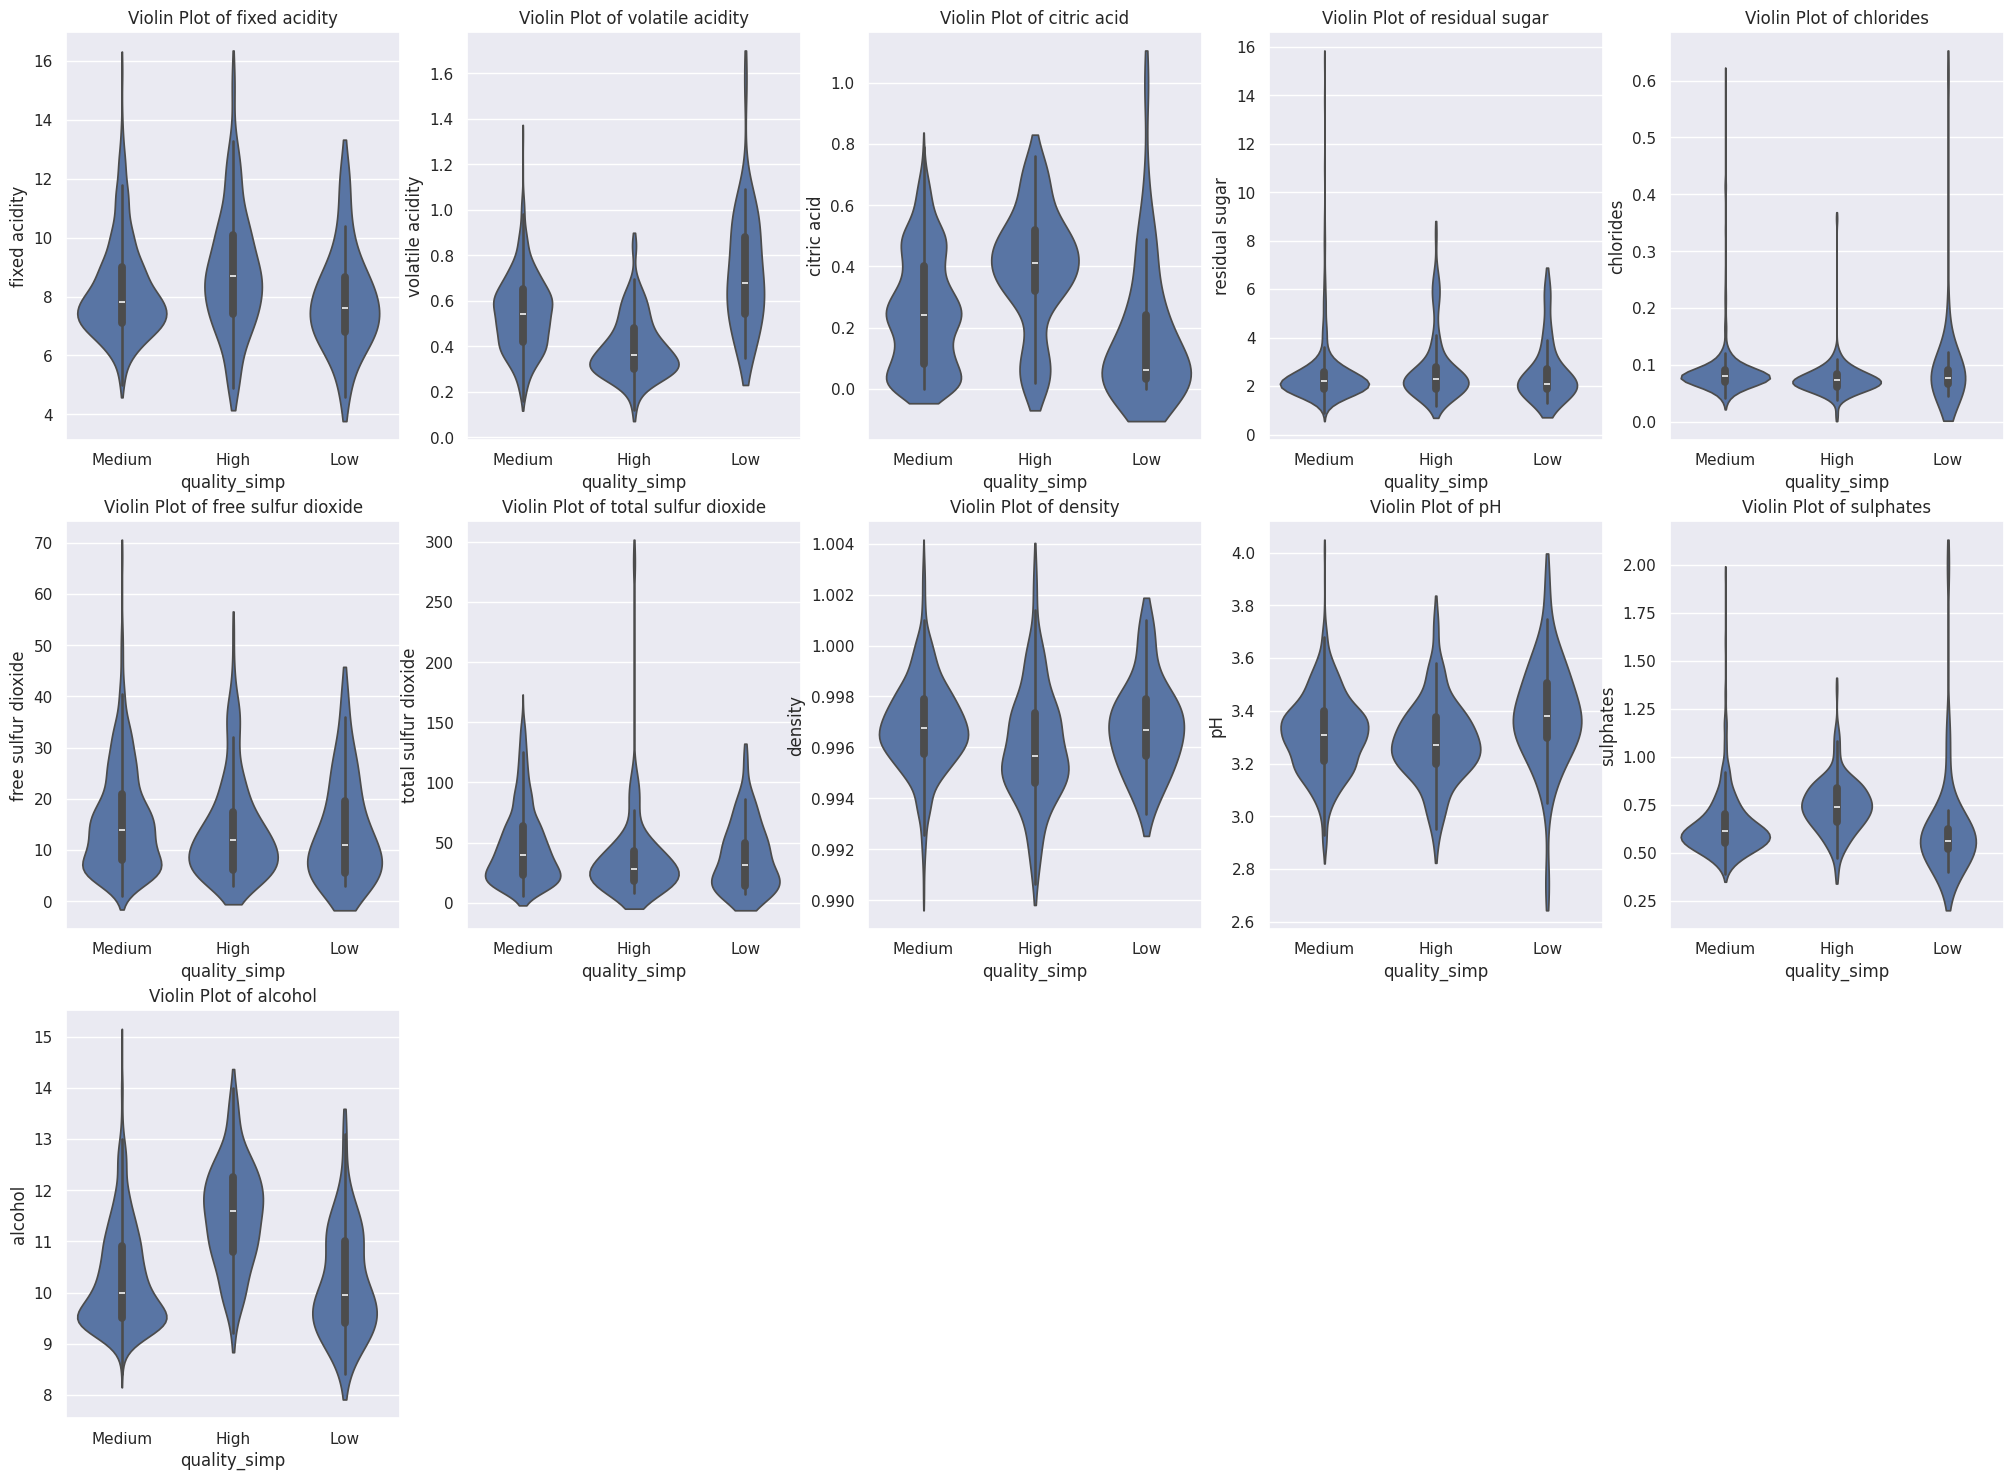

In [8]:
list_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

plt.figure(figsize = (25,18))
count = 1
for i in list_col:
    plt.subplot(3,5,count)
    plt.title(f'Violin Plot of {i}')
    sns.violinplot(data = df, x = 'quality_simp', y = i, cut= True)
    count += 1

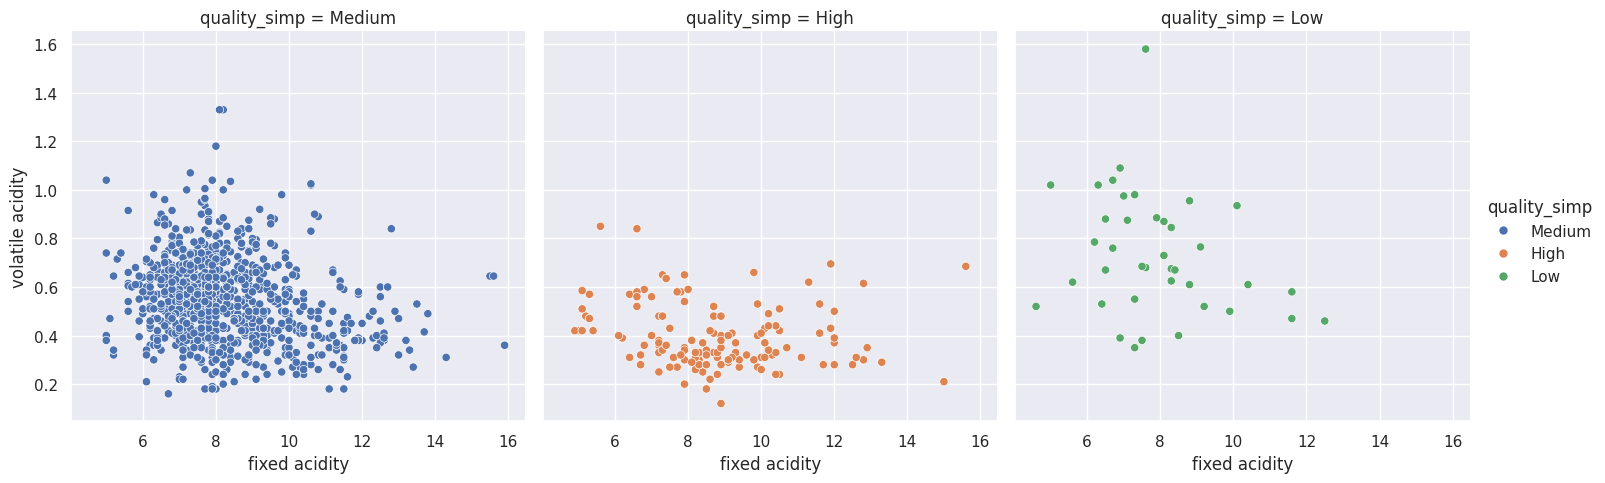

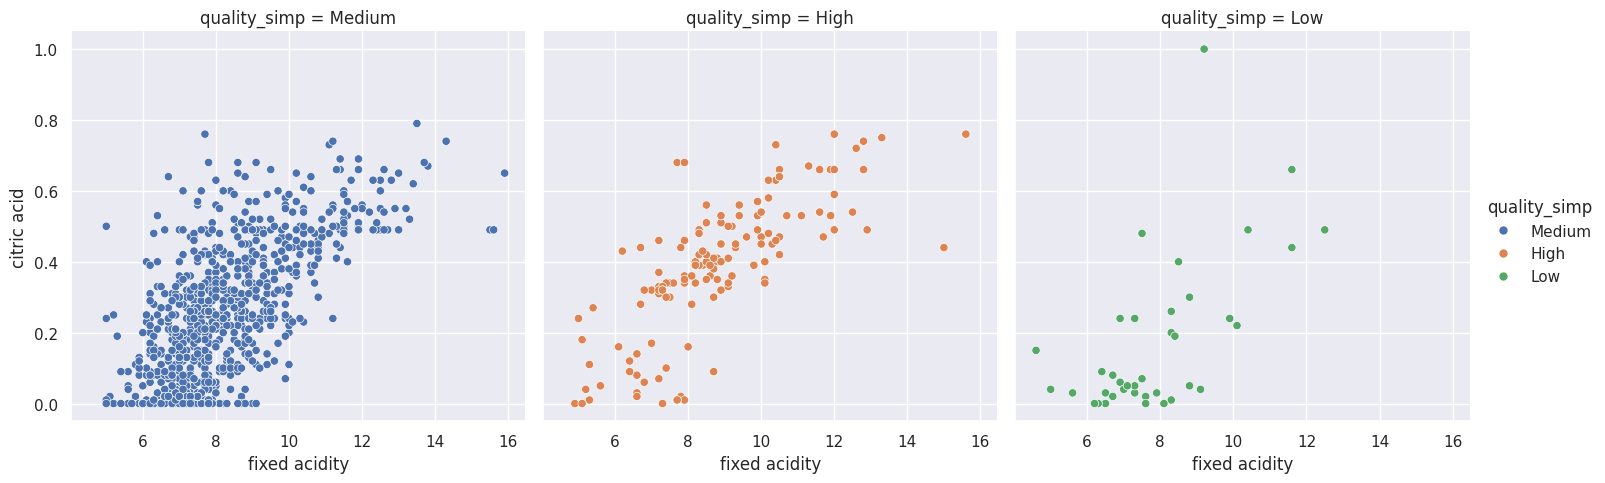

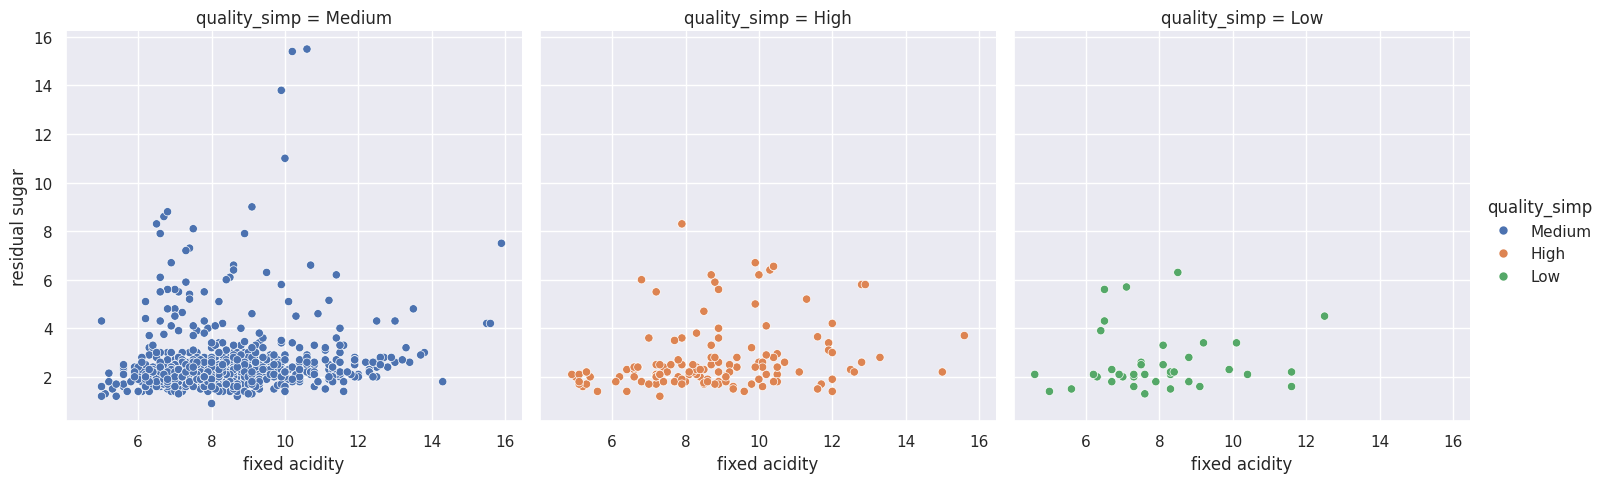

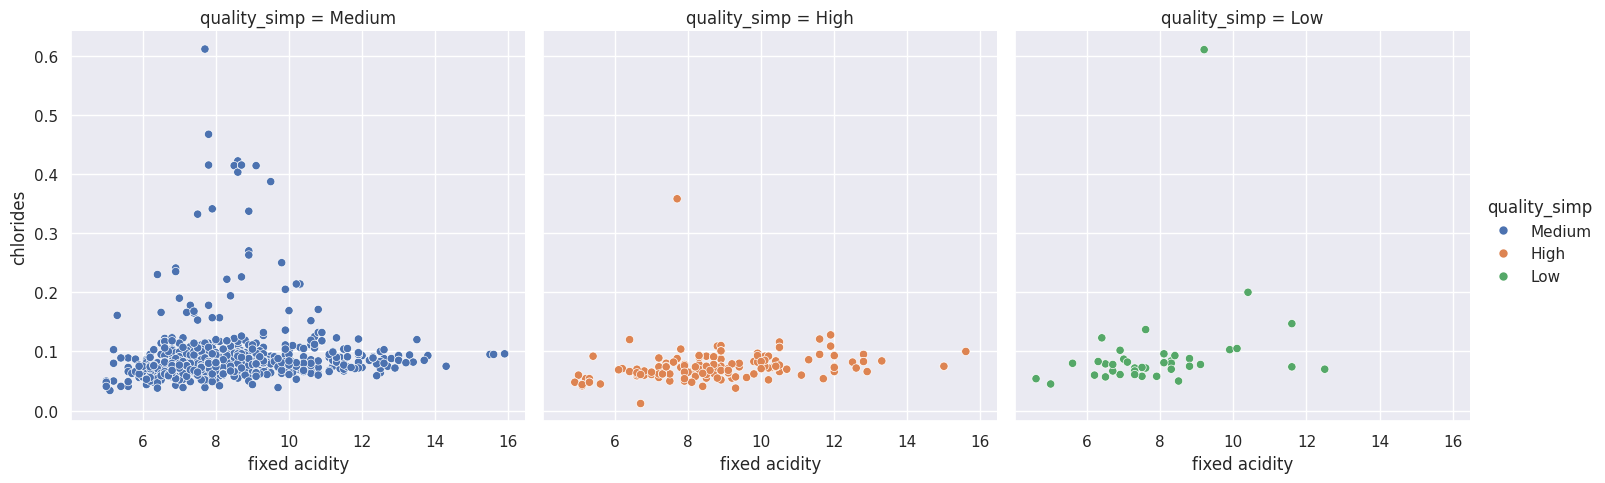

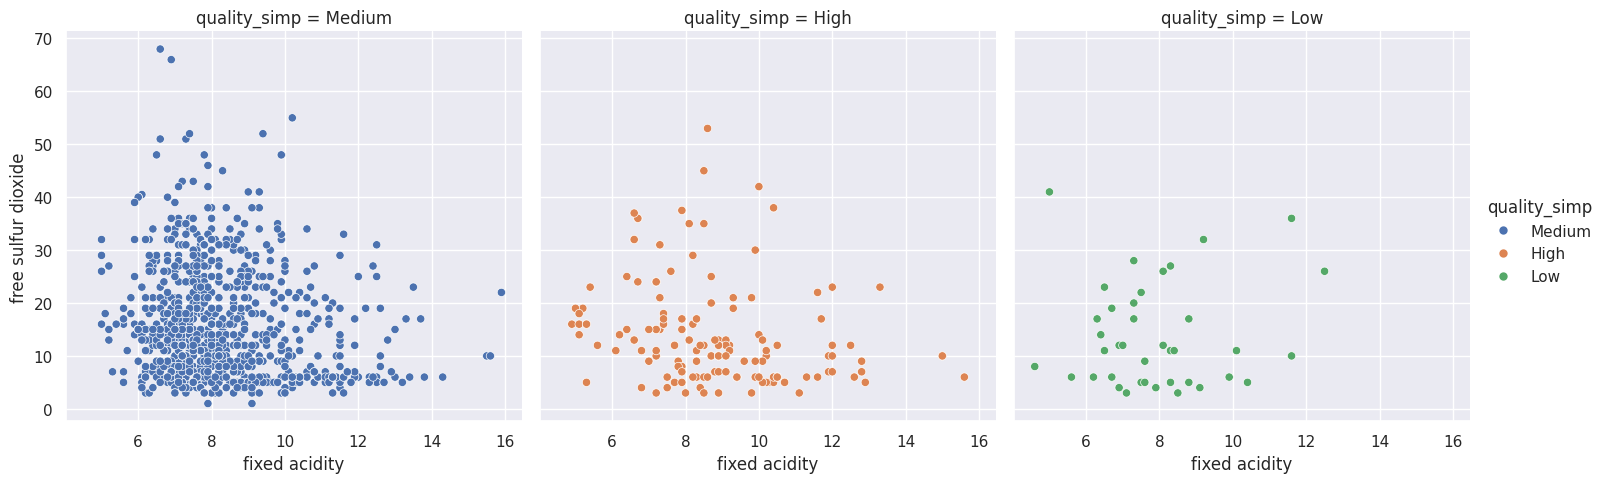

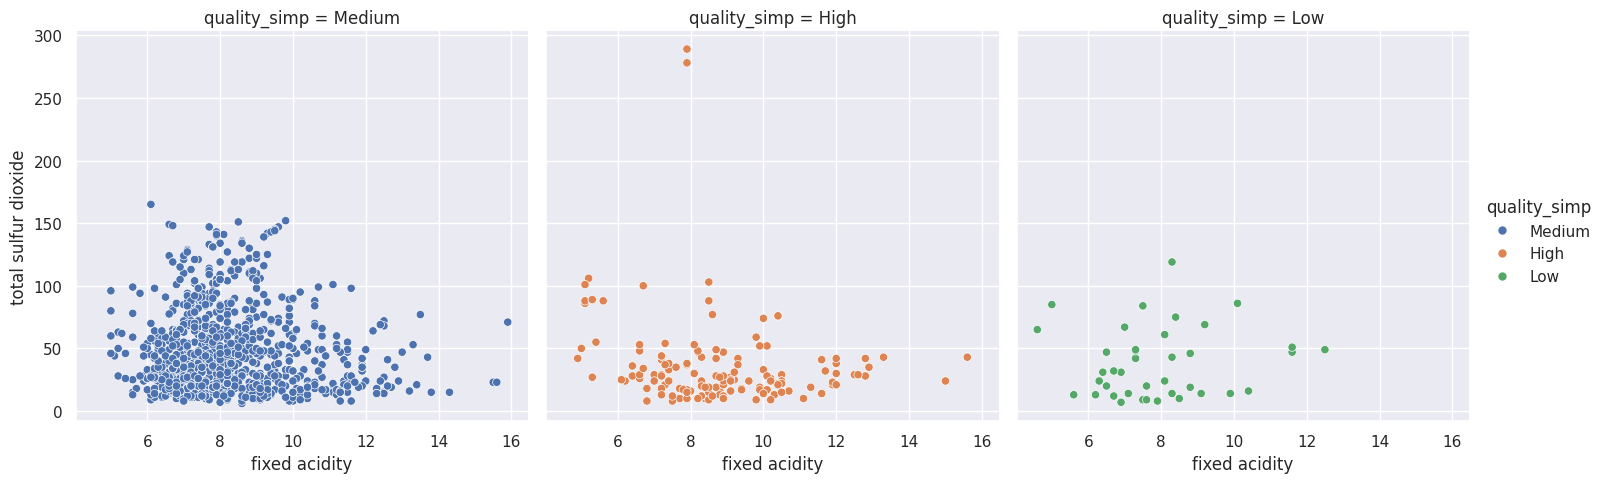

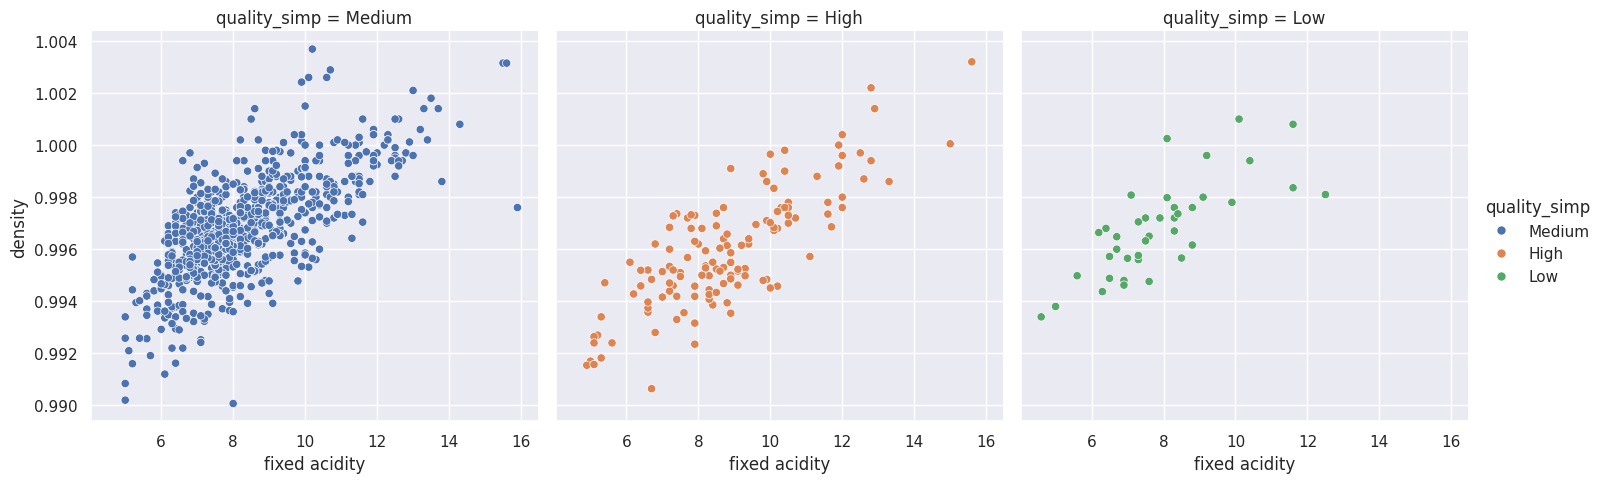

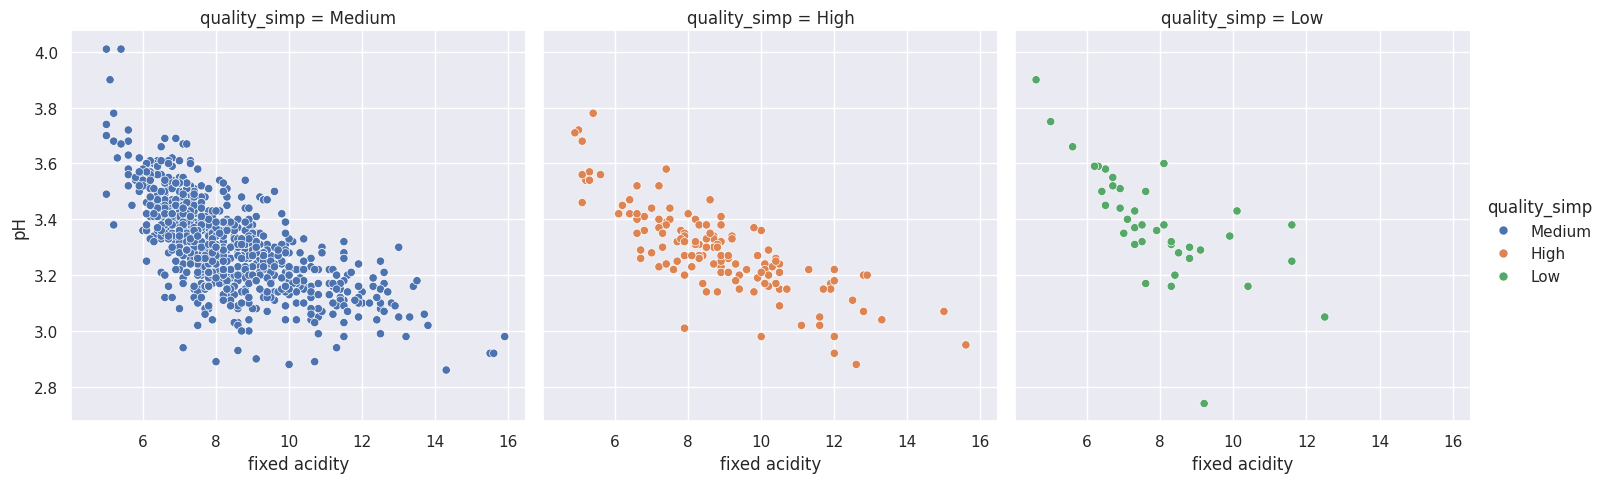

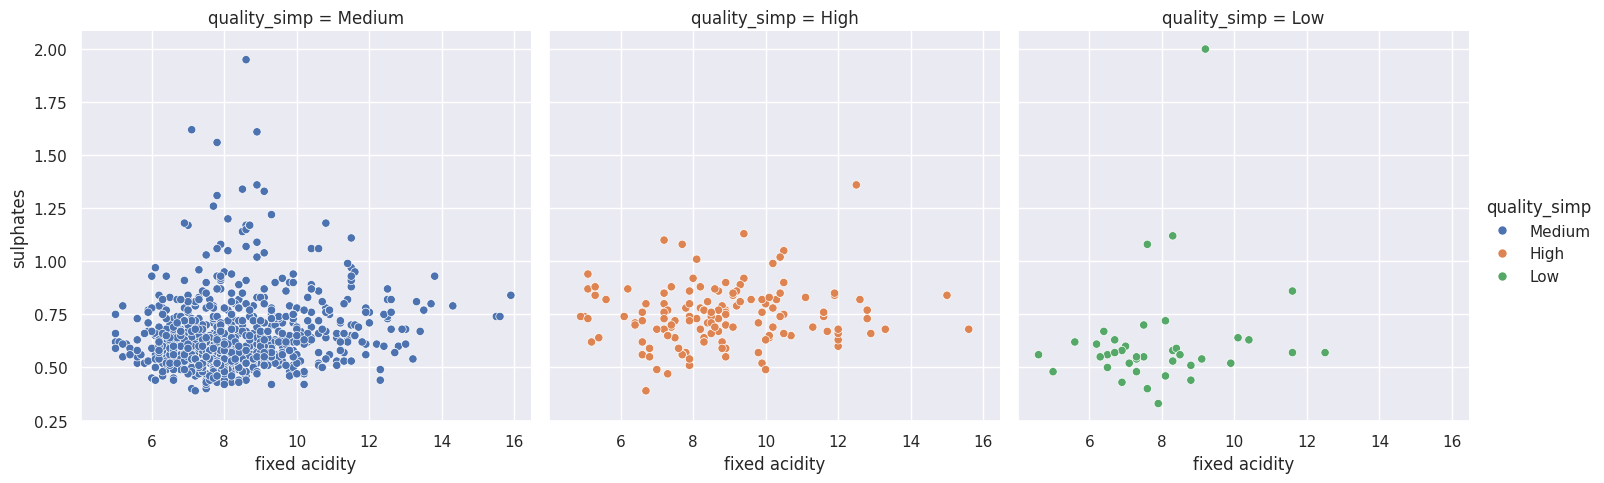

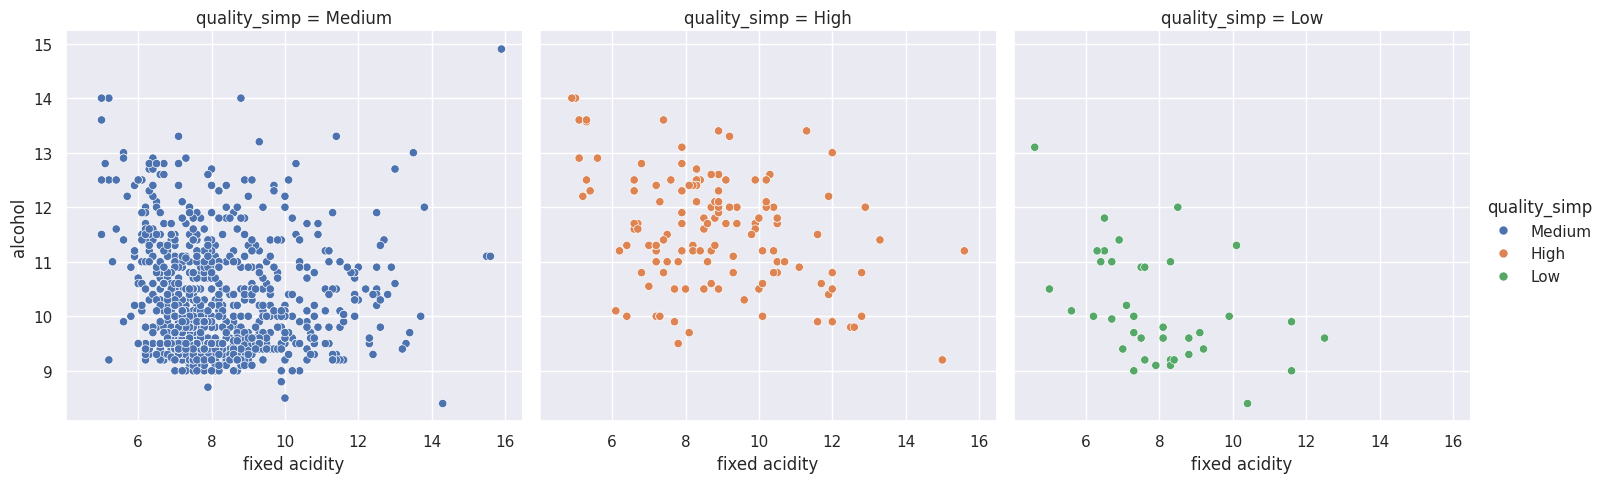

In [9]:
list_col_1 = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

count = 1
for i in list_col_1:
    sns.relplot(data = df, x = 'fixed acidity', y = i, col= 'quality_simp', kind= 'scatter', hue= 'quality_simp');

# Insight Data
1. In general, the scatter plot shows the distribution of variables separated by quality variables tends to be similar to each other
2. Citric acid, free sulfur dioxide, total sulfur dioxide, and alcohol variables have different distributions over the quality variable
3. The Alcohol, volatile acidity, and citric acid variables have different mean distributions by the quality variable that shows in the violin plot

# Training Model

In [10]:
X = df.drop(columns=['quality', 'quality_simp'])
y = df.quality_simp

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.25, random_state= 40)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((857, 12), (857,), (286, 12), (286,))

In [11]:
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy= 'median')),
    ('transform', PowerTransformer(method="yeo-johnson")),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only= True))
])

pipe = Pipeline([
    ('number', num_pipe),
    ('algo', LogisticRegression(max_iter=1000, multi_class= 'ovr'))
])
parameter = {
    'algo__C': np.logspace(-3,3,7),
    'algo__fit_intercept': [True, False],
    'number__poly__degree': [2,3],
    'number__poly__interaction_only': [True, False]
}

model = RandomizedSearchCV(pipe, param_distributions= parameter, n_iter= 50, random_state= 42, verbose= 0, n_jobs= -1,cv =3, scoring= 'f1_weighted')
model.fit(X_train, y_train)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('number',
                                              Pipeline(steps=[('impute',
                                                               SimpleImputer(strategy='median')),
                                                              ('transform',
                                                               PowerTransformer()),
                                                              ('scaler',
                                                               StandardScaler()),
                                                              ('poly',
                                                               PolynomialFeatures(interaction_only=True))])),
                                             ('algo',
                                              LogisticRegression(max_iter=1000,
                                                                 multi_class='ovr'))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'algo__fit_intercept': [True, False],
                                        'number__poly__degree': [2, 3],
                                        'number__poly__interaction_only': [True,
                                                                           False]},
                   random_state=42, scoring='f1_weighted')

In [12]:
print(f' Best Parameter : {model.best_params_}')
print(f' Best Score: {model.best_score_}, Training Score: {model.score(X_train, y_train)}, Test Score: {model.score(X_test, y_test)}')

 Best Parameter : {'number__poly__interaction_only': False, 'number__poly__degree': 3, 'algo__fit_intercept': False, 'algo__C': 0.1}
 Best Score: 0.8331157555431109, Training Score: 0.959048494010571, Test Score: 0.8143977971502482


# Result

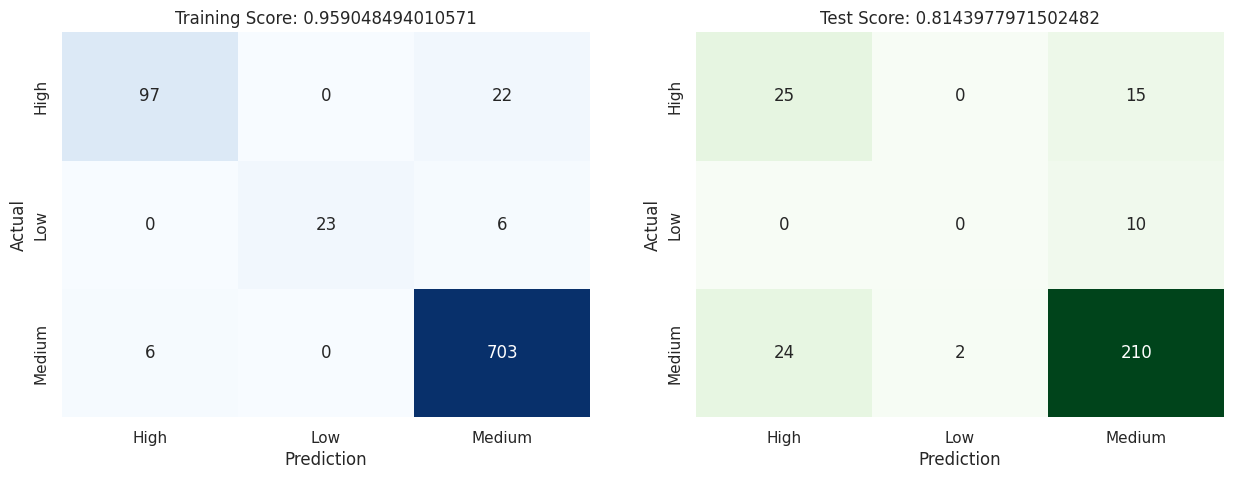

In [13]:
cm1 = pd.crosstab(y_train, model.predict(X_train))
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.title(f'Training Score: {model.score(X_train, y_train)}')
sns.heatmap(cm1, annot=True, cmap='Blues',fmt='g',cbar=False )
plt.xlabel('Prediction')
plt.ylabel('Actual');

cm2 = pd.crosstab(y_test, model.predict(X_test))
plt.subplot(122)
plt.title(f'Test Score: {model.score(X_test, y_test)}')
sns.heatmap(cm2, annot=True, cmap='Greens',fmt='g',cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actual');